In [1]:
#config sistem, abaikan
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

# Permodelan Pemangsa-Mangsa dengan Intervensi Manusia

## Abstrak
Laporan ini menyajikan alternatif solusi model Lotka Volterra untuk sistem biologi dengan intervensi manusia. Dengan menggunakan Runge-Kutta 4 – parameter diukur – unit. Hasil ini menunjukkan nilai yang signifikan dengan prediksi teoritis dan perkembangan terhadap model Lotka-Volterra aneane:v . Model yang disajikan dapat digunakan untuk menganalisis –

## Pendahuluan
Jeez, membaca hasil literatur yang mengaji populasi tuna dan mencocokkannya dengan buku shiflet “situasi di laut Mediterania” dan letak tuna di jaring ekosistem... sekip. < penghubung antar paragraf > menurunkan hubungan mangsa, pemangsa, dan manusia secara diferensial. Selanjutnya, model akan dicek

## Asumsi
populasi tidak terbatasi? karena jumlah makanan pred banyak, laut luas. k_birthPred jika dipakai,
k_deathPred sepertinya juga...

## Data Kita

In [5]:
PopPrey = [100]
PopPred = [15]
k_birthPrey = 2
k_deathPred = 1.06
k_PreyKilled = 0.02
k_PredKilling= 0.01
k_catch = 0

lengthSim = 240 #unit waktu bulan
dt = 1/lengthSim

## Ujicoba 1, Euler Method

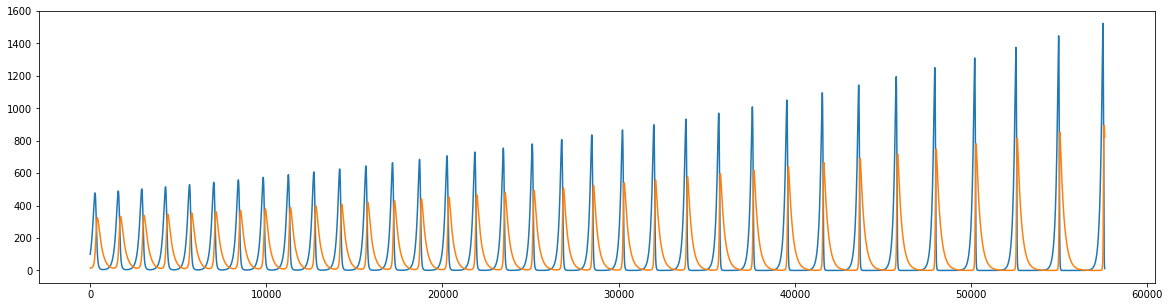

In [4]:
for i in range(int(lengthSim/dt)):
    # hitung populasi baru
    interaction = PopPrey[-1]*PopPred[-1]
    new_popPrey = PopPrey[-1] + (k_birthPrey*PopPrey[-1]  - k_PreyKilled*interaction - k_catch*PopPrey[-1]) * dt
    new_popPred = PopPred[-1] + (k_PredKilling*interaction - k_deathPred*PopPred[-1] - k_catch*PopPred[-1]) * dt

    # cek logika
    if new_popPrey<0:
        new_popPrey = 0
    if new_popPred<0:
        new_popPred = 0

    # tambahkan ke akhir array
    PopPrey.append(new_popPrey)
    PopPred.append(new_popPred)

plt.plot(PopPrey)
plt.plot(PopPred)

oh shiete, populasi tidak konvergen (andaikan memang divergen, well, tidak ada pemangsa di dunia ini, sebuah kontradiksi). Walaupun sulit, kita perlu... Runge Kutta 4. Masih menggunakan data awal yang sama, kita perlu mengubah kode sebelumnya menjadi

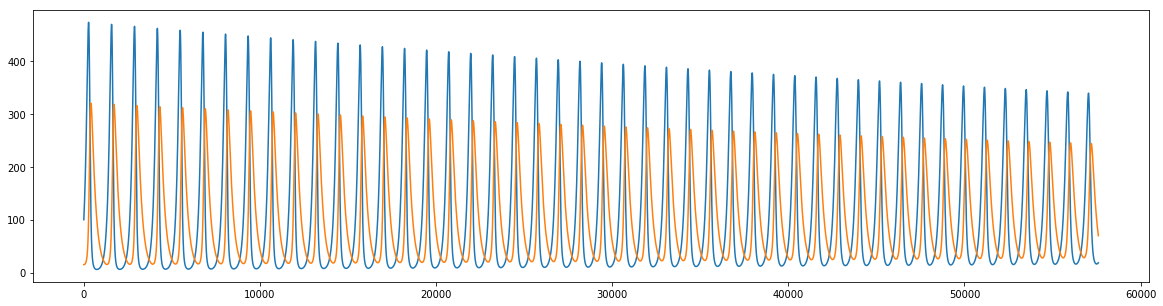

In [6]:
for i in range(int(lengthSim/dt)):
    # hitung populasi baru, RK4. it hurts karena kita ngga punya f(x,y) secara langsung
    # jujur saya, saya ingin menyembunyikan kode ini, coz it's not a good way presenting
    # hasil penelitian
    y1 = PopPrey[-1] + (k_birthPrey*PopPrey[-1]  - k_PreyKilled*PopPrey[-1]*PopPred[-1] - k_catch*PopPrey[-1]) * dt
    d1 = PopPred[-1] + (k_PredKilling*PopPrey[-1]*PopPred[-1] - k_deathPred*PopPred[-1] - k_catch*PopPred[-1]) * dt
    y2 = PopPrey[-1] + (k_birthPrey*y1  - k_PreyKilled*y1*d1 - k_catch*y1) * dt/2
    d2 = PopPred[-1] + (k_PredKilling*y1*d1 - k_deathPred*d1 - k_catch*d1) * dt/2
    y3 = PopPrey[-1] + (k_birthPrey*y2  - k_PreyKilled*y2*d2 - k_catch*y2) * dt/2
    d3 = PopPred[-1] + (k_PredKilling*y2*d2 - k_deathPred*d2 - k_catch*d2) * dt/2
    y4 = PopPrey[-1] + (k_birthPrey*y3  - k_PreyKilled*y3*d3 - k_catch*y3) * dt
    d4 = PopPred[-1] + (k_PredKilling*y3*d3 - k_deathPred*d3 - k_catch*d3) * dt
    
    new_popPrey = PopPrey[-1] + (2*(y2-PopPrey[-1]) + 4*(y3-PopPrey[-1]) + 2*(y4-PopPrey[-1]) + (k_birthPrey*y4  - k_PreyKilled*y4*d4 - k_catch*y4)*dt)/6
    new_popPred = PopPred[-1] + (2*(d2-PopPred[-1]) + 4*(d3-PopPred[-1]) + 2*(d4-PopPred[-1]) + (k_PredKilling*y4*d4 - k_deathPred*d4 - k_catch*d4)*dt)/6
    
    # cek logika
    if new_popPrey<0:
        new_popPrey = 0
    if new_popPred<0:
        new_popPred = 0

    # tambahkan ke akhir array
    PopPrey.append(new_popPrey)
    PopPred.append(new_popPred)

plt.plot(PopPrey)
plt.plot(PopPred)

damn, feels so good.

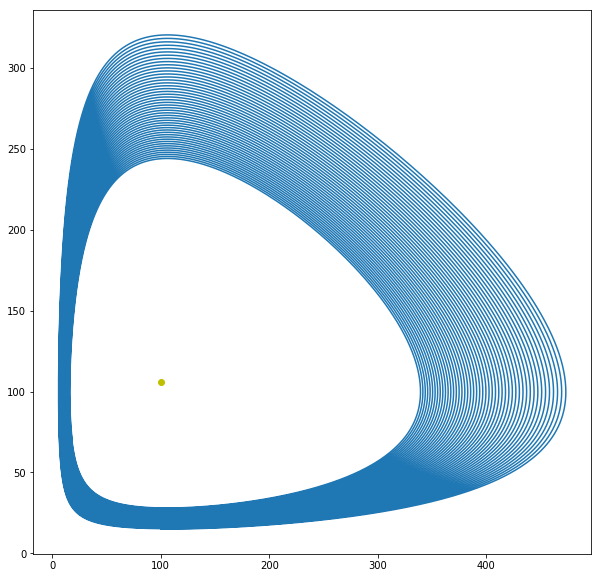

In [8]:
plt.plot(PopPrey, PopPred)
# titik keseimbangan, edited from Wikipedia with common sense
plt.plot((k_birthPrey-k_catch)/k_PreyKilled, (k_deathPred+k_catch)/k_PredKilling, 'yo')